# Final Python Notebook 3: Regression & Ensemble Modelling

In [64]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [65]:
# Load Cleaned Dataset
df = pd.read_csv("Cleaned Cancer Dataset.csv")

In [66]:
# Fill any remaining numeric missing values
df = df.fillna(df.mean(numeric_only=True))

In [67]:
# Encode Categorical Variables (Reused from Session 1 Q23)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

In [68]:
# Classification Ensemble Model (Voting Classifier)
X_cls = df.drop(columns=['Mortality_Status', 'Survival_Months'])
y_cls = df['Mortality_Status']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
mlp = MLPClassifier(max_iter=1000, random_state=42)

In [69]:
voting_clf = VotingClassifier(estimators=[
    ('lr', logreg),
    ('dt', dt)
], voting='soft')

voting_clf.fit(X_train_cls, y_train_cls)
y_pred_voting = voting_clf.predict(X_test_cls)

print("\nEnsemble Voting Classifier Evaluation:\n")
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_voting))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_voting))

if hasattr(voting_clf, "predict_proba"):
        try:
            y_prob = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_prob)
            print("AUC-ROC Score:", auc)
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
        except:
            print("AUC-ROC cannot be computed for multi-class output.\n")


Ensemble Voting Classifier Evaluation:


Confusion Matrix:
 [[586  99]
 [ 78  42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       685
           1       0.30      0.35      0.32       120

    accuracy                           0.78       805
   macro avg       0.59      0.60      0.60       805
weighted avg       0.80      0.78      0.79       805

AUC-ROC cannot be computed for multi-class output.



In [70]:
# Rename the typo'd column
df.rename(columns={'Reginol_Node_Positive': 'Regional_Node_Positive'}, inplace=True)

In [71]:
# Regression Models for Survival Months Prediction
X_reg = df.drop(columns=['Survival_Months', 'Mortality_Status'])
y_reg = df['Survival_Months']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

In [72]:
# Pruned Decision Tree Regressor (max depth 5)
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)

In [73]:
# Multiple Linear Regression
mlr = LinearRegression()

In [74]:
# Fit the models
dtr.fit(X_train_reg, y_train_reg)
mlr.fit(X_train_reg, y_train_reg)

LinearRegression()

In [75]:
# DTR Learnable Parameters
print("DTR Tree Depth:", dtr.get_depth())
print("DTR Number of Leaves:", dtr.get_n_leaves())

DTR Tree Depth: 5
DTR Number of Leaves: 29


In [76]:
# MLR Learnable Parameters
print("Intercept:", mlr.intercept_)
print("Coefficients:", mlr.coef_)
print("Feature Names:", X_train_reg.columns.tolist())

Intercept: 73.7482407003526
Coefficients: [-0.09412842  0.95216457  0.06030038 -0.87820334  0.52607046 -0.49910453
 -1.49032159 -0.07795611  6.5364384   2.19076263  0.12926378 -0.43865783]
Feature Names: ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive']


In [77]:
# Decision Tree Regressor (DTR)
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr.fit(X_train_reg, y_train_reg)
y_pred_dtr = dtr.predict(X_test_reg)

In [78]:
# Multiple Linear Regression (MLR)
mlr = LinearRegression()
mlr.fit(X_train_reg, y_train_reg)
y_pred_mlr = mlr.predict(X_test_reg)

In [79]:
# Evaluate Regression Models
print("\nDecision Tree Regressor Performance:")
print("MSE:", mean_squared_error(y_test_reg, y_pred_dtr))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_dtr)))
print("MAE:", mean_absolute_error(y_test_reg, y_pred_dtr))
print("R2 Score:", r2_score(y_test_reg, y_pred_dtr))

print("\nMultiple Linear Regression Performance:")
print("MSE:", mean_squared_error(y_test_reg, y_pred_mlr))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_mlr)))
print("MAE:", mean_absolute_error(y_test_reg, y_pred_mlr))
print("R2 Score:", r2_score(y_test_reg, y_pred_mlr))


Decision Tree Regressor Performance:
MSE: 694.013121004512
RMSE: 26.344128776721995
MAE: 19.0810648952335
R2 Score: -0.298521351885239

Multiple Linear Regression Performance:
MSE: 95650681799.07228
RMSE: 309274.4441415622
MAE: 10918.80398023199
R2 Score: -178965567.34358278


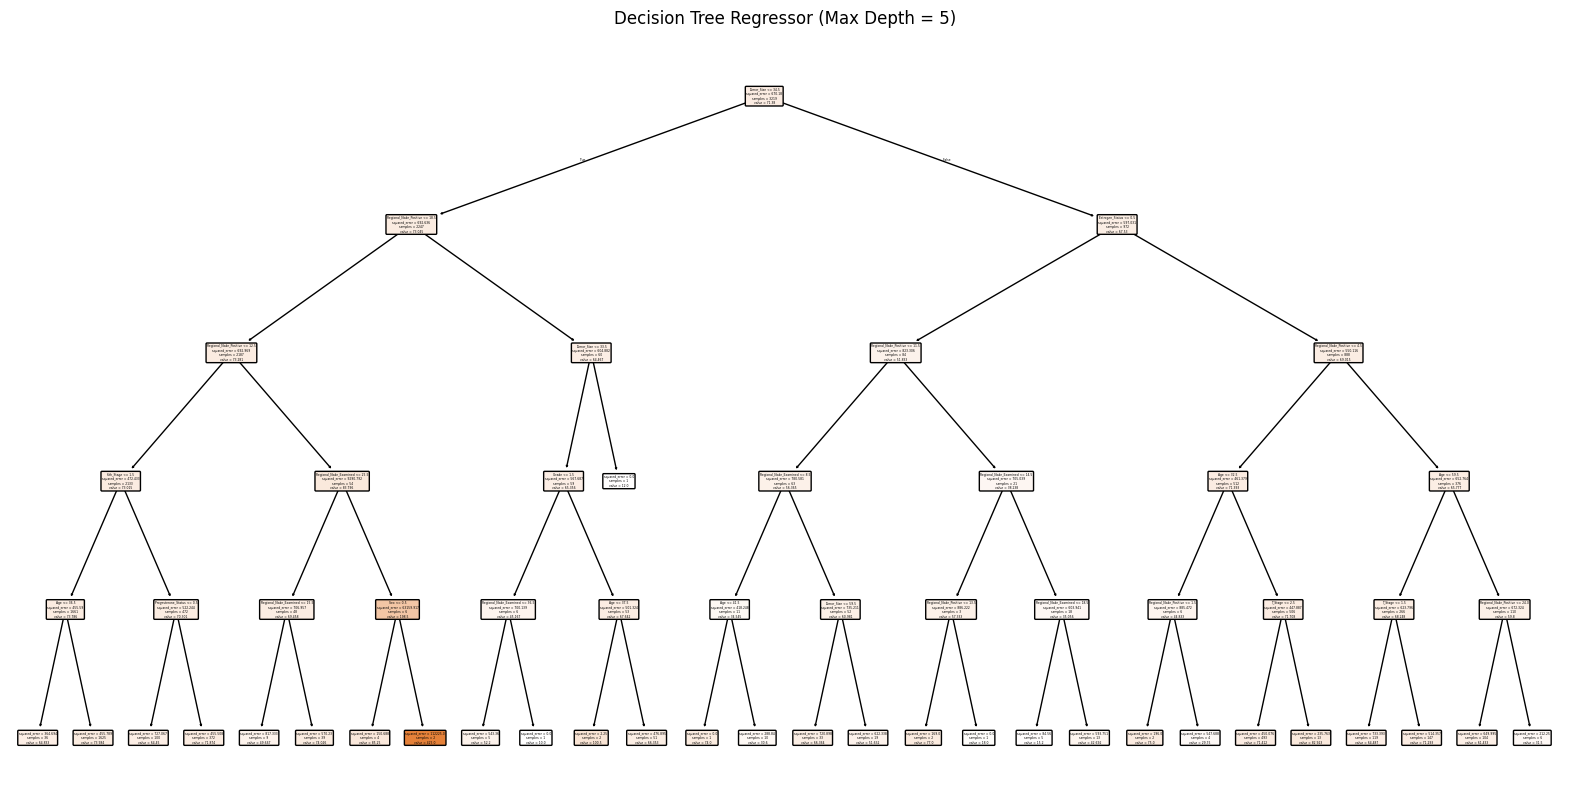

In [80]:
# Visualise Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dtr, feature_names=X_reg.columns, filled=True, rounded=True)
plt.title("Decision Tree Regressor (Max Depth = 5)")
plt.savefig("regression_tree_plot.png", dpi=300)
plt.show()

In [81]:
# Step 1: Ensure the input features match the model's training features
print(X_train_reg.columns.tolist())

['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive']


In [82]:
# Step 2: Define Patient B002567's input (column names must match exactly)
patient = pd.DataFrame([{
    'Age': 40,
    'Sex': 0,
    'T_Stage': 2,
    'N_Stage': 2,
    '6th_Stage': 3,
    'Differentiated': 1,
    'Grade': 2,
    'Tumor_Size': 32,
    'Estrogen_Status': 1,
    'Progesterone_Status': 0,
    'Regional_Node_Examined': 10,
    'Regional_Node_Positive': 2
}])

In [83]:
# Step 3: Predict survival months using Decision Tree Regressor (DTR)
prediction_dtr = dtr.predict(patient)[0]

# Step 4: Print the results
print("Predicted Survival Months for Patient B002567")
print("→ Decision Tree Regressor (DTR):", round(prediction_dtr, 2), "months")

Predicted Survival Months for Patient B002567
→ Decision Tree Regressor (DTR): 64.45 months


In [84]:
# Step 3: Predict survival months using Multiple Linear Regression (MLR)
prediction_mlr = mlr.predict(patient)[0]

# Step 4: Print the results
print("Predicted Survival Months for Patient B002567")
print("→ Multiple Linear Regression (MLR):", round(prediction_mlr, 2), "months")

Predicted Survival Months for Patient B002567
→ Multiple Linear Regression (MLR): 70.9 months
